In [ ]:
! pip install xgboost
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular.all import df_shrink
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import make_pipeline
import pickle
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/capstone project

/content/drive/MyDrive/capstone project


In [ ]:
df = pd.read_csv("TON_IOT_pre.unknown")

In [ ]:
print(df.shape)
df.head()

(1210789, 20)


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,53927,1900,17,153.12,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [ ]:
df.drop(columns='Label', inplace=True)

In [ ]:
df1 = df[df['Attack']!="Benign"]

In [ ]:
print(df1.shape)
df1.head()

(998115, 19)


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
8,60641,53,17,5.0,108,108,2,2,0,4,dos,192,168,1,31,192,168,1,1
9,60641,53,17,5.0,108,108,2,2,0,4,injection,192,168,1,31,192,168,1,1
10,60641,53,17,5.0,108,108,2,2,0,4,ddos,192,168,1,31,192,168,1,1
11,38524,53,17,5.0,100,100,2,2,0,5,injection,192,168,1,31,192,168,1,1
12,38524,53,17,5.0,100,100,2,2,0,5,ddos,192,168,1,31,192,168,1,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998115 entries, 8 to 1210788
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 998115 non-null  int64  
 1   L4_DST_PORT                 998115 non-null  int64  
 2   PROTOCOL                    998115 non-null  int64  
 3   L7_PROTO                    998115 non-null  float64
 4   IN_BYTES                    998115 non-null  int64  
 5   OUT_BYTES                   998115 non-null  int64  
 6   IN_PKTS                     998115 non-null  int64  
 7   OUT_PKTS                    998115 non-null  int64  
 8   TCP_FLAGS                   998115 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  998115 non-null  int64  
 10  Attack                      998115 non-null  object 
 11  IPV4_SRC_ADDR_0             998115 non-null  int64  
 12  IPV4_SRC_ADDR_1             998115 non-null  int64  
 13  IPV4_SRC_ADDR

In [ ]:
df1 = df_shrink(df1, obj2cat=False, int2uint=False)

In [ ]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998115 entries, 8 to 1210788
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 998115 non-null  int32  
 1   L4_DST_PORT                 998115 non-null  int32  
 2   PROTOCOL                    998115 non-null  int8   
 3   L7_PROTO                    998115 non-null  float32
 4   IN_BYTES                    998115 non-null  int32  
 5   OUT_BYTES                   998115 non-null  int32  
 6   IN_PKTS                     998115 non-null  int16  
 7   OUT_PKTS                    998115 non-null  int16  
 8   TCP_FLAGS                   998115 non-null  int8   
 9   FLOW_DURATION_MILLISECONDS  998115 non-null  int32  
 10  Attack                      998115 non-null  object 
 11  IPV4_SRC_ADDR_0             998115 non-null  int16  
 12  IPV4_SRC_ADDR_1             998115 non-null  int16  
 13  IPV4_SRC_ADDR

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
X = df1.drop(columns='Attack')
y = df1['Attack']

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pickle
with open('adyson-multi.pkl', 'rb') as f:
   oversample = pickle.load(f)

In [ ]:
oversample = ADASYN()

In [ ]:
X, y = oversample.fit_resample(X, y)

KeyboardInterrupt: ignored

In [ ]:
print(X.shape)
print(y.shape)

(4191440, 18)
(4191440,)


In [ ]:
import pickle
with open('adyson-multi.pkl', 'wb') as f:
    pickle.dump(oversample, f)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)


In [ ]:
print(y.shape)

(4191440,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit_transform(X_train, X_test)

array([[-0.8633356 ,  0.13887452, -0.60921156, ...,  0.30611441,
        -0.31604031,  0.80099124],
       [ 0.16449248, -0.12959907,  1.67364513, ...,  0.30611441,
        -0.31604031, -1.57394781],
       [-0.14157189, -0.11110727, -0.60921156, ...,  0.30611441,
        -0.31604031,  0.76388282],
       ...,
       [-1.58197376, -0.11110727, -0.60921156, ...,  0.30611441,
        -0.31604031,  0.76388282],
       [ 0.28170094, -0.11110727, -0.60921156, ...,  0.30611441,
        -0.31604031,  0.82573019],
       [-1.50840291, -0.11110727, -0.60921156, ...,  0.30611441,
        -0.31604031,  0.2938428 ]])

In [ ]:
first_10_rows = y[:10]

print(first_10_rows)

0          dos
1    injection
2         ddos
3    injection
4         ddos
5    injection
6         ddos
7     scanning
8          dos
9    injection
Name: Attack, dtype: object


In [ ]:
! pip install catboost
from catboost import CatBoostClassifier
# Create a CatBoostClassifier model
model4 = CatBoostClassifier()

# Fit the model to the training data
model4.fit(X_train, y_train)

# Make predictions on the test data
predictions = model4.predict(X_test)

# Evaluate the model on the test data
accuracy = model4.score(X_test, y_test)
print('Accuracy:', accuracy)

Learning rate set to 0.119314
0:	learn: 1.7776221	total: 5.96s	remaining: 1h 39m 14s
1:	learn: 1.5665550	total: 10.9s	remaining: 1h 30m 34s
2:	learn: 1.4223477	total: 16.5s	remaining: 1h 31m 20s
3:	learn: 1.3116412	total: 20.9s	remaining: 1h 26m 56s
4:	learn: 1.2275949	total: 26.9s	remaining: 1h 29m 7s
5:	learn: 1.1572152	total: 31.6s	remaining: 1h 27m 22s
6:	learn: 1.0960230	total: 36s	remaining: 1h 25m 10s
7:	learn: 1.0472687	total: 41.3s	remaining: 1h 25m 21s
8:	learn: 0.9977671	total: 46.3s	remaining: 1h 24m 54s
9:	learn: 0.9544149	total: 50.4s	remaining: 1h 23m 6s
10:	learn: 0.9227816	total: 55.3s	remaining: 1h 22m 53s
11:	learn: 0.8887422	total: 1m	remaining: 1h 23m 24s
12:	learn: 0.8650196	total: 1m 4s	remaining: 1h 22m 8s
13:	learn: 0.8403675	total: 1m 12s	remaining: 1h 24m 34s
14:	learn: 0.8182059	total: 1m 16s	remaining: 1h 23m 41s
15:	learn: 0.7977140	total: 1m 21s	remaining: 1h 23m 5s
16:	learn: 0.7805219	total: 1m 27s	remaining: 1h 23m 53s
17:	learn: 0.7637133	total: 1m 31

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    backdoor       1.00      0.99      0.99    116152
        ddos       0.63      0.66      0.64    119727
         dos       0.77      0.97      0.86    115420
   injection       0.88      0.39      0.54    115697
        mitm       0.96      0.97      0.97    116080
    password       0.64      0.53      0.58    121813
  ransomware       0.99      1.00      0.99    116559
    scanning       0.73      0.82      0.77    116719
         xss       0.74      0.99      0.85    109693

    accuracy                           0.81   1047860
   macro avg       0.82      0.81      0.80   1047860
weighted avg       0.82      0.81      0.80   1047860



In [ ]:
classification_report = classification_report(y_test, predictions)

In [ ]:
confusion_matrix = classification_report.confusion_matrix

In [ ]:
plt.figure(figsize=(10, 7)) sns.heatmap(confusion_matrix, annot=True, fmt='d') plt.xlabel('Predicted') plt.ylabel('True') plt.title('Confusion Matrix') plt.show()

In [ ]:
score = accuracy_score(y_test, y_pred3)

In [ ]:
print("Accuracy:", score)

In [ ]:
print(classification_report(y_test,y_pred3))

In [ ]:
from numpy import mean
from numpy import std
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model_3= XGBClassifier(learning_rate=0.02, n_estimators=600)
# evaluate model
scores = cross_val_score(model_3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
pred3 =model_3.predict(X_test)
print(classification_report(y_test, pred3))

In [ ]:
model_3.fit(X_train,y_train)

In [ ]:
pred3 =model_3.predict(X_test)

In [ ]:
model_3.score(X_test, y_test)

In [ ]:
pred3 =model_3.predict(X_test)

In [ ]:
print(classification_report(y_test, pred3))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
y_test_classes = y_test.astype("category").cat.categories

In [ ]:
# Create a bar chart of the predicted probabilities for each class
plt.figure(figsize=(10, 6))
sns.barplot(
    y=y_test_classes,
    x=pred3[:, 0],
    orient="h",
    color="blue",
    linewidth=2,
    edgecolor="white",
)

# Add labels and title
plt.xlabel("Predicted probability")
plt.ylabel("Class")
plt.title("XGBoost multi-class percentages of classes")
plt.show()

In [ ]:
# new model 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit_transform(X_train, X_test)

array([[-0.85028746,  0.13828019, -0.60919519, ...,  0.30573754,
        -0.3160383 ,  0.8010095 ],
       [ 0.16451225, -0.12954247,  1.67374807, ...,  0.30573754,
        -0.3160383 , -1.57413988],
       [-0.1416224 , -0.1110955 , -0.60919519, ...,  0.30573754,
        -0.3160383 ,  0.76389779],
       ...,
       [-1.58311155, -0.1110955 , -0.60919519, ...,  0.30573754,
        -0.3160383 ,  0.76389779],
       [ 0.2817016 , -0.1110955 , -0.60919519, ...,  0.30573754,
        -0.3160383 ,  0.82575064],
       [-1.50474492, -0.1110955 , -0.60919519, ...,  0.30573754,
        -0.3160383 ,  0.29381615]])

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=9,random_state=0)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
pred2 =rf.predict(X_test)

In [ ]:
rf.score(X_test, y_test)

0.7010354436661386

In [ ]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

    backdoor       0.97      0.90      0.94    116152
        ddos       0.93      0.19      0.32    119727
         dos       0.75      0.95      0.84    115420
   injection       0.88      0.32      0.47    115697
        mitm       0.84      0.93      0.88    116080
    password       0.43      0.64      0.51    121813
  ransomware       0.95      0.99      0.97    116559
    scanning       0.41      0.47      0.44    116719
         xss       0.63      0.96      0.76    109693

    accuracy                           0.70   1047860
   macro avg       0.76      0.70      0.68   1047860
weighted avg       0.75      0.70      0.68   1047860



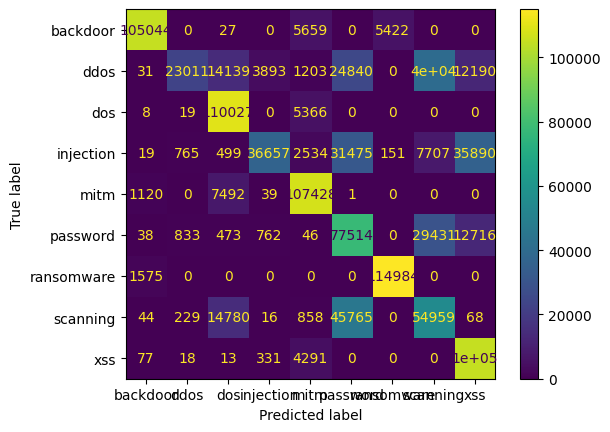

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test);

In [ ]:
# Import accuracy_score from scikit-learn
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
acc = accuracy_score(y_test,pred2)

# Print the accuracy score
print("The accuracy of the model is:", acc)

The accuracy of the model is: 0.7010354436661386


In [ ]:
pipe1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
pipe1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
pipe1.score(X_test, y_test)

0.6579237684423491

In [ ]:
pred = pipe1.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    backdoor       0.85      0.71      0.77    116152
        ddos       0.62      0.22      0.32    119727
         dos       0.71      0.97      0.82    115420
   injection       0.66      0.29      0.41    115697
        mitm       0.85      0.82      0.83    116080
    password       0.47      0.51      0.49    121813
  ransomware       0.83      0.94      0.88    116559
    scanning       0.41      0.56      0.47    116719
         xss       0.63      0.92      0.75    109693

    accuracy                           0.66   1047860
   macro avg       0.67      0.66      0.64   1047860
weighted avg       0.67      0.66      0.64   1047860



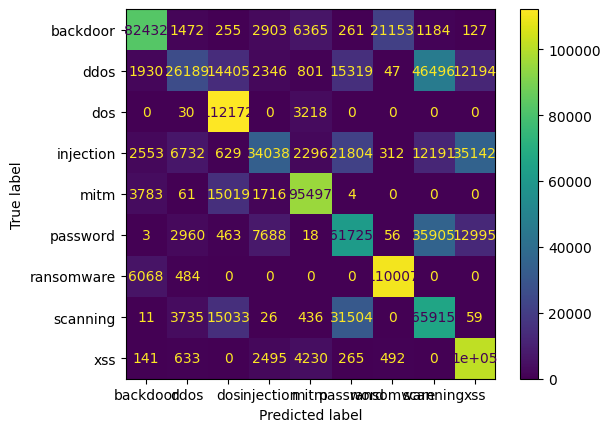

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe1,X_test,y_test);

In [ ]:
pipe2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=0)
)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [ ]:
params = {
    'randomforestclassifier__n_estimators' : n_estimators ,
    'randomforestclassifier__max_features' : max_features ,
    'randomforestclassifier__max_depth' : max_depth ,
    'randomforestclassifier__min_samples_split' : min_samples_split
}

In [ ]:
rf_random = RandomizedSearchCV(
    pipe2,
    params,
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-1fbfdc3ce0bc>", line 1, in <cell line: 1>
    rf_random.fit(X_train,y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1768, in _run_search
    evaluate_candidates(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1952, in __call__
    return output if self.return_generator el

In [ ]:
pred2 =rf_model.predict(X_test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-bf315a060f73>", line 1, in <cell line: 1>
    pred2 =rf_model.predict(X_test)
NameError: name 'rf_model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPy

In [ ]:
print(classification_report(y_test, pred))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-bd7a13701ce3>", line 1, in <cell line: 1>
    print(classification_report(y_test, pred))
NameError: name 'pred' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packa

In [ ]:
pipe2.score(X_test, y_test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-63512716a460>", line 1, in <cell line: 1>
    pipe2.score(X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py", line 989, in transform
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1390, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before usi

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe2,X_test,y_test);

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-8d5490e19d70>", line 1, in <cell line: 1>
    ConfusionMatrixDisplay.from_estimator(pipe2,X_test,y_test);
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/confusion_matrix.py", line 320, in from_estimator
    y_pred = estimator.predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py", line 989, in transform
    check_is_fitted(self)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1390, in check_is_fitted
    raise 

In [ ]:
filename= 'mulyi_class_rand'
pickle.dump(rf_model , 'wb')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-3126bcdc5e80>", line 2, in <cell line: 2>
    pickle.dump(rf_model , 'wb')
NameError: name 'rf_model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPytho

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-3126bcdc5e80>", line 2, in <cell line: 2>
    pickle.dump(rf_model , 'wb')
NameError: name 'rf_model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/in

In [ ]:
loaded_model =pickle.load(open(filename),'rb')
loaded_model.scores()